## Working with the OpenAI API

### Text completions

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

prompt="""Replace car with plane and adjust phrase:
A car is a vehicle that is typically powered by an internal combustion engine or an electric motor. It has four wheels, and is designed to carry passengers and/or cargo on roads or highways. Cars have become a ubiquitous part of modern society, and are used for a wide variety of purposes, such as commuting, travel, and transportation of goods. Cars are often associated with freedom, independence, and mobility."""

# Create a request to the Completions endpoint
response = client.completions.create(
  model = 'gpt-3.5-turbo-instruct',
  prompt = prompt,
  max_tokens = 100
)

# Extract and print the response text
print(response.choices[0].text)

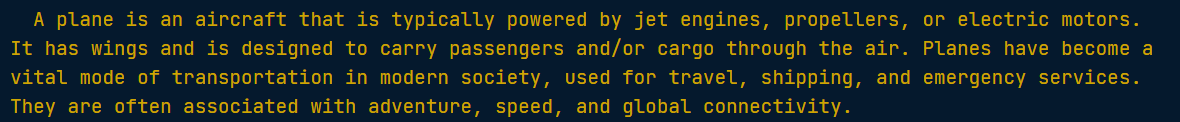

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

prompt="""Summarize the following text into two concise bullet points:
Investment refers to the act of committing money or capital to an enterprise with the expectation of obtaining an added income or profit in return. There are a variety of investment options available, including stocks, bonds, mutual funds, real estate, precious metals, and currencies. Making an investment decision requires careful analysis, assessment of risk, and evaluation of potential rewards. Good investments have the ability to produce high returns over the long term while minimizing risk. Diversification of investment portfolios reduces risk exposure. Investment can be a valuable tool for building wealth, generating income, and achieving financial security. It is important to be diligent and informed when investing to avoid losses."""

# Create a request to the Completions endpoint
response = client.completions.create(
  model = 'gpt-3.5-turbo-instruct',
  max_tokens = 400,
  temperature = 0,
  prompt = prompt
)

print(response.choices[0].text)

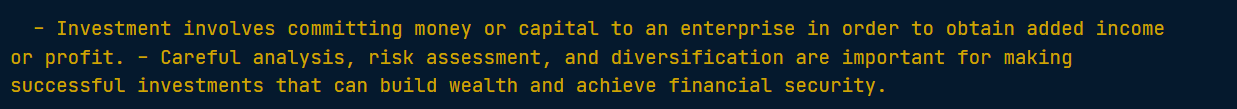

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create a request to the Completions endpoint
response = client.completions.create(
  model="gpt-3.5-turbo-instruct",
  prompt = 'generate a catchy slogan for a new restaurant. restaurant cuisine is indian and type of restaurant fast-food',
  max_tokens = 100
)

print(response.choices[0].text)

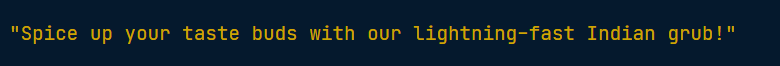

### Text completions for classification tasks

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create a request to the Completions endpoint
response = client.completions.create(
  model="gpt-3.5-turbo-instruct",
  prompt="Classify the following statements as negative, positive or neutral:\
  - Unbelievably good!\
  - Shoes fell apart on the second use.\
  - The shoes look nice, but they aren't very comfortable.\
  - Can't wait to show them off!",
  max_tokens=100
)

print(response.choices[0].text)

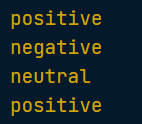

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create a request to the Completions endpoint
response = client.completions.create(
  model="gpt-3.5-turbo-instruct",
  prompt="Categorize the following companies: Apple, Microsoft, Saudi Aramco, Alphabet, Amazon, Berkshire Hathaway, NVIDIA, Meta, Tesla, LVMH",
  max_tokens=100,
  temperature=0.5
)

print(response.choices[0].text)

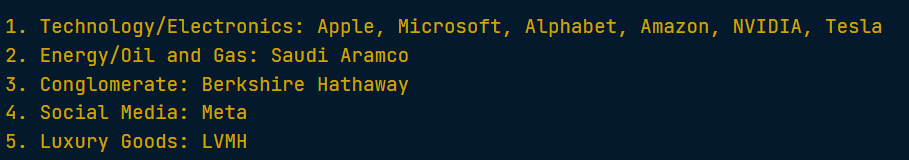

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create a request to the Completions endpoint
response = client.completions.create(
  model="gpt-3.5-turbo-instruct",
  prompt="Categorize the following companies into (Tech, Energy, Luxury Goods, or Investment): Apple, Microsoft, Saudi Aramco, Alphabet, Amazon, Berkshire Hathaway, NVIDIA, Meta, Tesla, LVMH",
  max_tokens=100,
  temperature=0.5
)

print(response.choices[0].text)

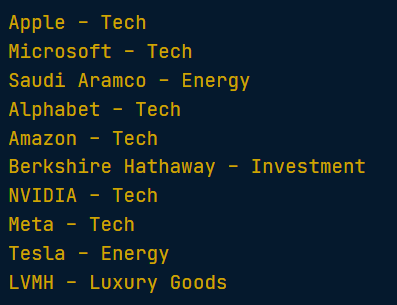

### Chat completions with GPT

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create a request to the Chat Completions endpoint
response = client.chat.completions.create(
  model="gpt-4o-mini",
  max_tokens=150,
  messages=[
    {"role": "system",
    "content": "You are a helpful data science tutor."},
    {"role": "user",
    "content": "What is the difference between a for loop and a while loop?"}
  ]
)

# Extract and print the assistant's text response
print(response.choices[0].message.content)

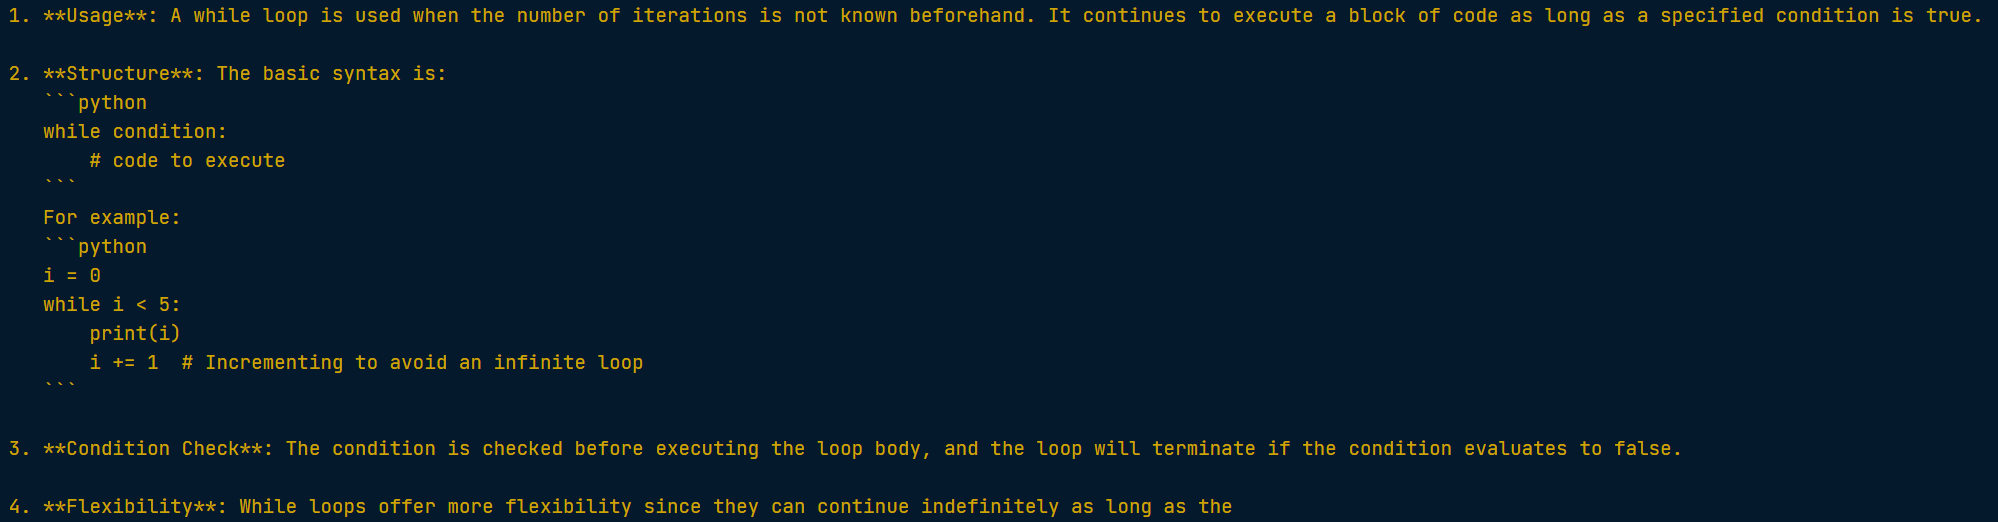

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

instruction = """Explain what this Python code does in one sentence:
import numpy as np

heights_dict = {"Mark": 1.76, "Steve": 1.88, "Adnan": 1.73}
heights = heights_dict.values()
print(np.mean(heights))
"""

# Create a request to the Chat Completions endpoint
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages = [
    {"role": "system",
    "content": "You are a helpful Python programming assistant."
    },
    {"role":"user", "content":instruction}],
  max_tokens=100
)

print(response.choices[0].message.content)

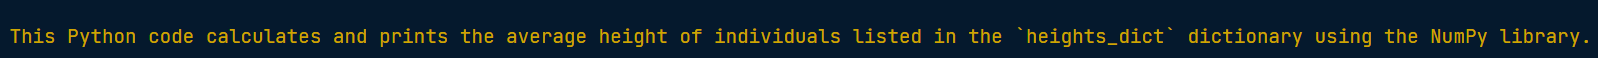

### Multi-turn chat completions with GPT

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

response = client.chat.completions.create(
    model="gpt-4o-mini",
    # Add a user and assistant message for in-context learning
    messages=[
        {"role": "system", "content": "You are a helpful Python programming tutor."},
        {"role": "user", "content": "What is Python language?"},
        {"role": "assistant", "content": "Python is a high level, general purpose programming language."},
        {"role": "user", "content": "Explain what the type() function does."}
    ]
)

print(response.choices[0].message.content)

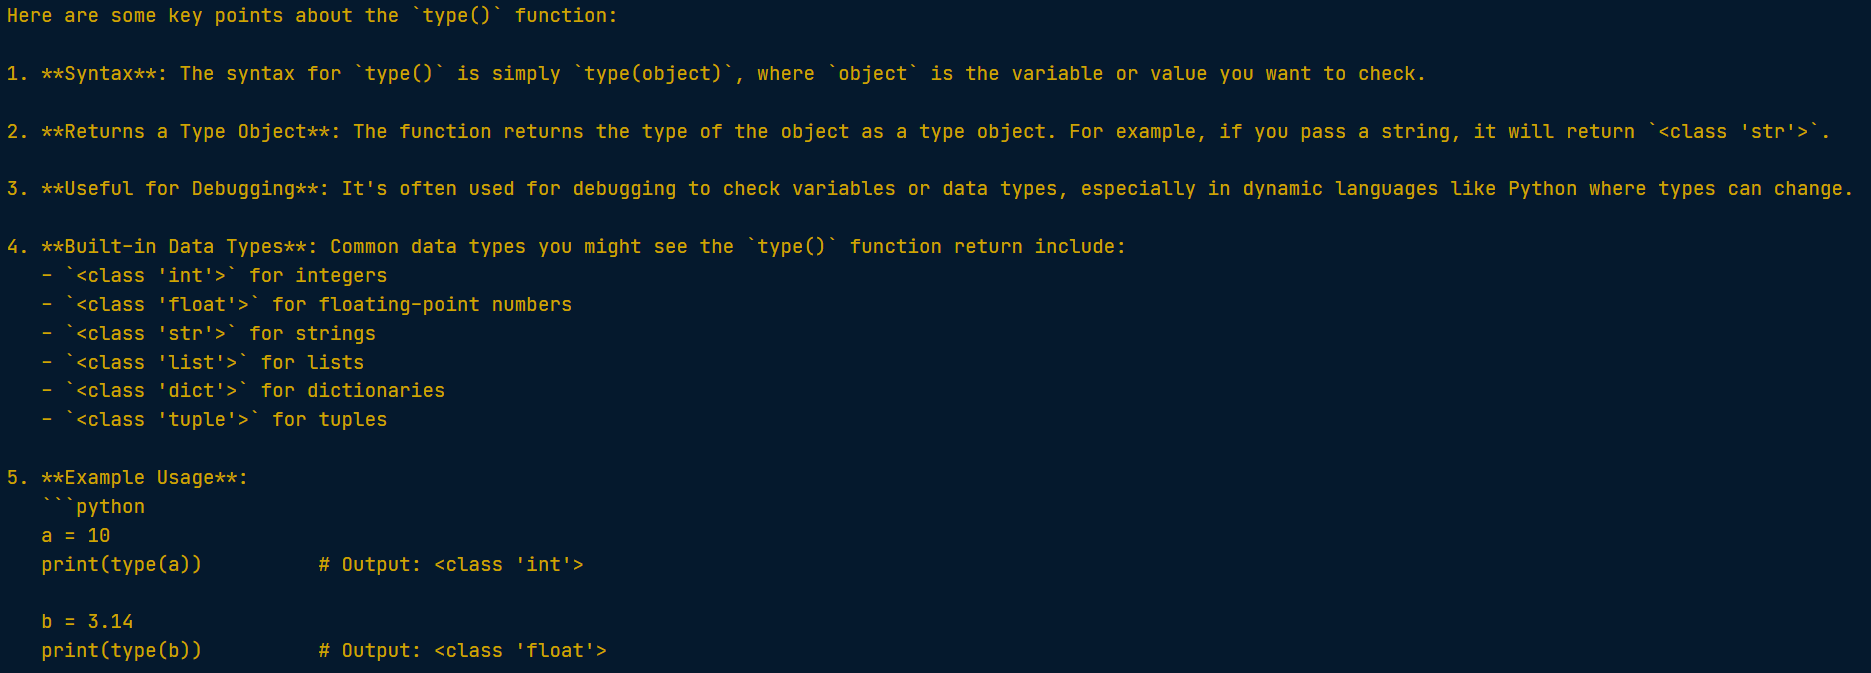

**Creating an AI chatbot**

An online learning platform called Easy as Pi that specializes in teaching math skills has contracted you to help develop an AI tutor. You immediately see that you can build this feature on top of the OpenAI API, and start to design a simple proof-of-concept (POC) for the major stakeholders at the company. This POC will demonstrate the core functionality required to build the final feature and the power of the OpenAI's GPT models.
Example system and user messages have been provided for you, but feel free to play around with these to change the model's behavior or design a completely different chatbot!

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

messages = [{"role": "system", "content": "You are a helpful math tutor."}]
user_msgs = ["Explain what pi is.", "Summarize this in two bullet points."]

for q in user_msgs:
    print("User: ", q)
    
    # Create a dictionary for the user message from q and append to messages
    user_dict = {"role": "user", "content": q}
    messages.append(user_dict)
    
    # Create the API request
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages = messages,
        max_tokens = 100
    )
    
    # Convert the assistant's message to a dict and append to messages
    assistant_dict = {"role": "assistant", "content": response.choices[0].message.content}
    messages.append(assistant_dict)
    print("Assistant: ", response.choices[0].message.content, "\n")

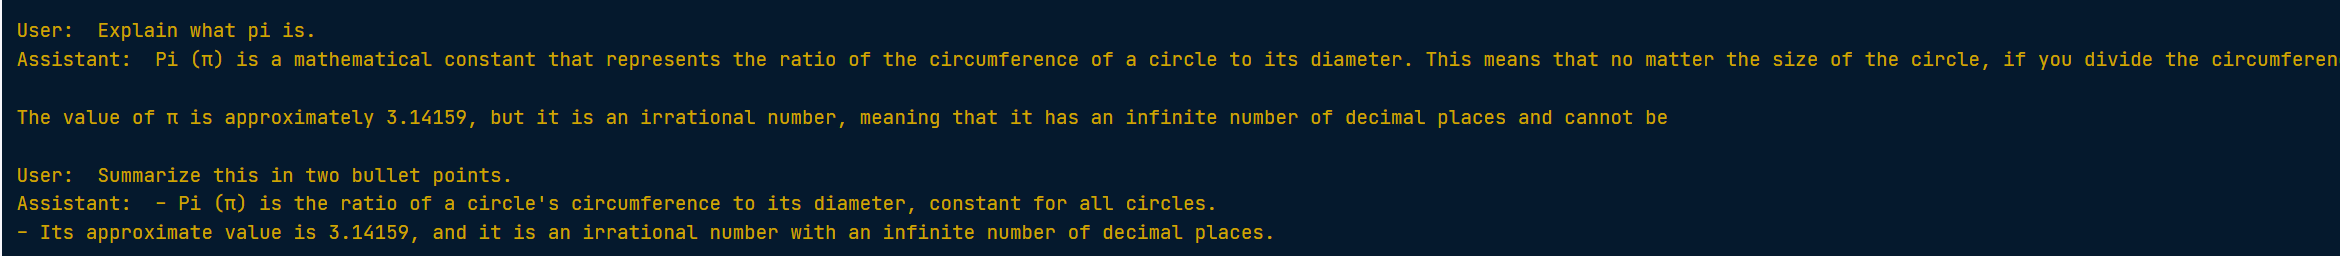

## Going Beyond Text Completions

### Text moderation

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create a request to the Moderation endpoint
response = client.moderations.create(
    model='text-moderation-latest',
    input="My favorite book is To Kill a Mockingbird."
)

# Print the category scores
print(response.model_dump())

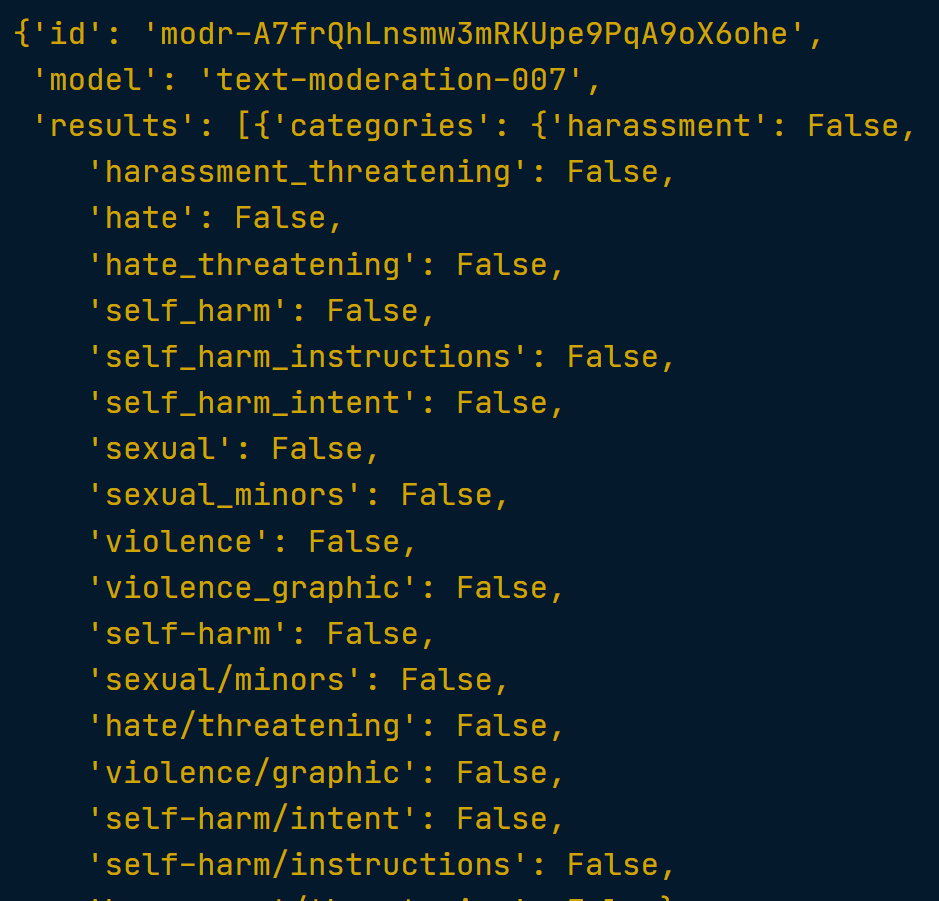

### Speech-to-TextTranscription withWhisper

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Open the openai-audio.mp3 file
audio_file = open('openai-audio.mp3', 'rb')

# Create a transcript from the audio file
response = client.audio.transcriptions.create(
    model="whisper-1",
    file=audio_file)

# Extract and print the transcript text
print(response.text)

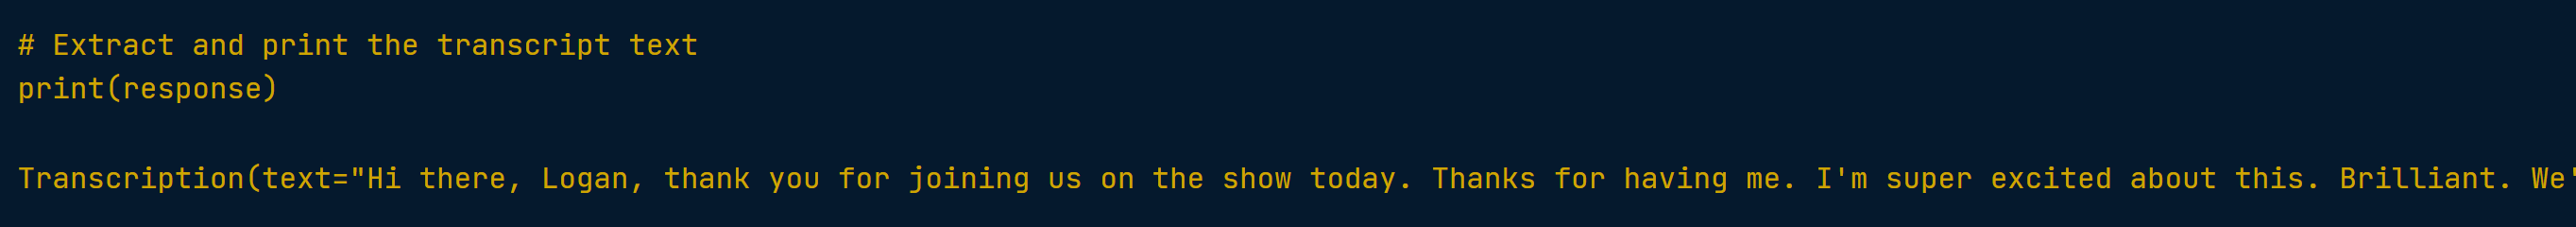
Hi there, Logan, thank you for joining us on the show today. Thanks for having me. I'm super excited about this. Brilliant. We're going to dive right in, and I think ChatGPT is maybe the most famous AI product that you have at OpenAI, but I'd just like to get an overview of what all the other AIs that are available are. So I think two and a half years ago, OpenAI released the API that we still have available today, which is essentially our giving people access to these models. And for a lot of people, giving people access to the model that powers ChatGPT, which is our consumer-facing first-party application, which essentially just, in very simple terms, puts a nice UI on top of what was already available through our API for the last two and a half years. So it's sort of democratizing the access to this technology through our API. If you want to just play around with it, as an end user, we have ChatGPT available to the world as well

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Open the audio.m4a file
audio_file = open('audio.m4a', "rb")

# Create a translation from the audio file
response = client.audio.translations.create(
    model='whisper-1',
    file=audio_file)

# Extract and print the translated text
print(response.text)

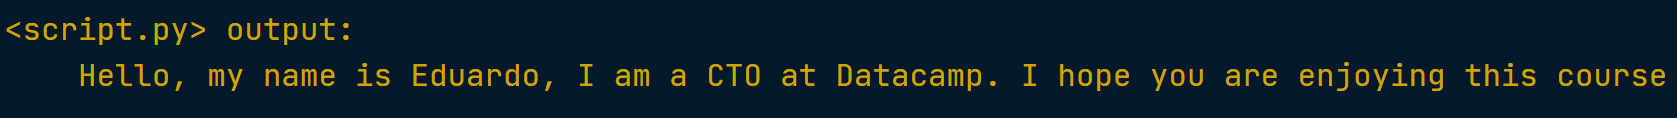

Hello, my name is Eduardo, I am a CTO at Datacamp. I hope you are enjoying this course that James and I have created for you. This API allows you to send an audio and bring it to English. The original audio is in Portuguese.

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Open the audio.wav file
audio_file = open('audio.wav', 'rb')

# Create a translation from the audio file
response = client.audio.translations.create(
    model='whisper-1',
    file=audio_file
)

print(response.text)

The World Bank said in its latest economic outlook report that the global economy is in a dangerous state. As interest rates rise, consumer spending and corporate investment will slow down, economic activities will be impacted, and the vulnerability of low-income countries will be exposed. Global economic growth will be significantly slowed down, and the stability of the financial system will be threatened.

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Open the audio.wav file
audio_file = open('audio.wav', 'rb')

# Write an appropriate prompt to help the model
prompt = "World Bank report"

# Create a translation from the audio file
response = client.audio.translations.create(
    model='whisper-1',
    file=audio_file,
    prompt=prompt
)

print(response.text)

The World Bank said in its latest economic outlook report that the global economy is in a dangerous state. As interest rates rise, consumer spending and corporate investment will slow down, economic activities will be impacted, and the vulnerability of low-income countries will be exposed. Global economic growth will be significantly slowed down, and the stability of the financial system will be threatened.

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Open the audio.wav file
audio_file = open('audio.wav', "rb")

# Create a transcription request using audio_file
audio_response = client.audio.transcriptions.create(
    model='whisper-1',
    file=audio_file
)

# Create a request to the API to identify the language spoken
chat_response = client.chat.completions.create(
    model='gpt-4o-mini',
    messages=[
        {
            'role': 'user',
            'content': "Identify language spoken : " + audio_response.text
        }
    ]
)

print(chat_response.choices[0].message.content)

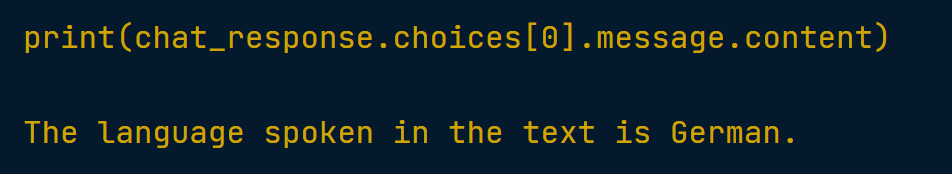

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Open the datacamp-q2-roadmap.mp3 file
audio_file = open('datacamp-q2-roadmap.mp3', 'rb')

# Create a transcription request using audio_file
audio_response = client.audio.transcriptions.create(
    model='whisper-1',
    file=audio_file
)
transcript = audio_response.text

# Create a request to the API to summarize the transcript into bullet points
chat_response = client.chat.completions.create(
    model='gpt-4o-mini',
    messages=[
        {
            'role': 'user',
            'content': 'Summarize into concise bullet points: '+ transcript
        }
    ]
)
print(chat_response.choices[0].message.content)

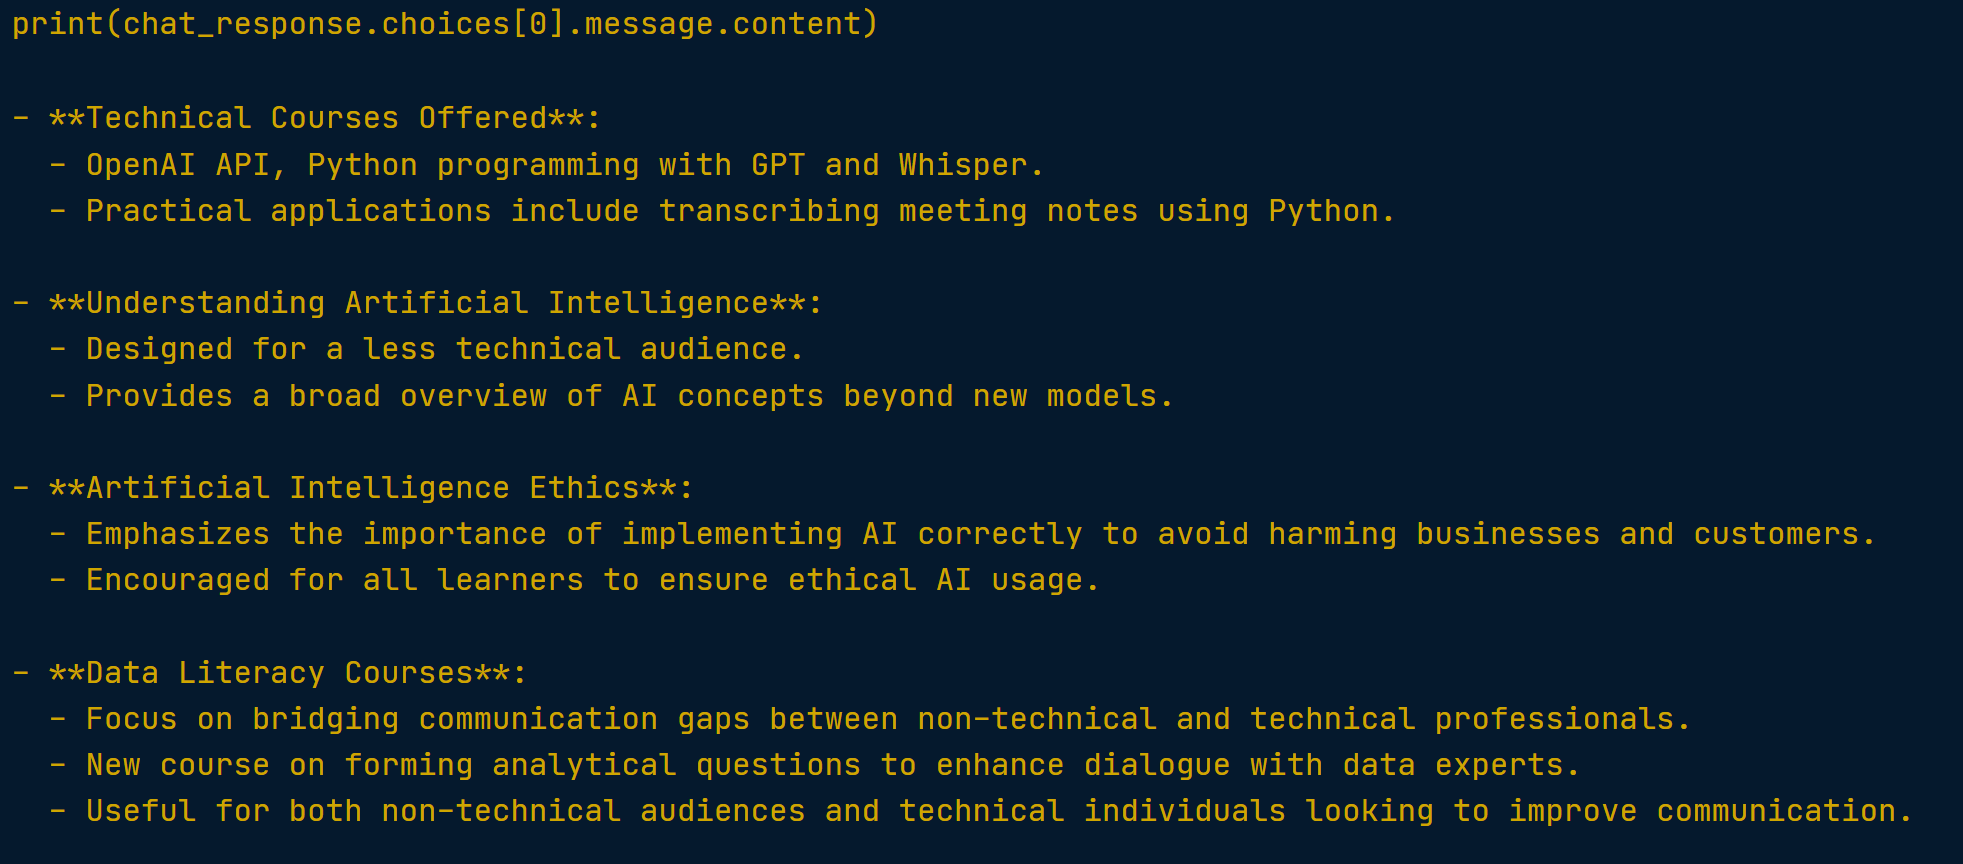